# Welcome the practice notebook 
--- 
The objective of this practice is to provide a hands-on experience in data exploration and cleaning. Please follow the instructions provided in the  notebook to complete the practice.

Installing pyspark

In [1]:
!pip install pyspark

Importing the needed modules and creating the spark session

In [4]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules 
import matplotlib.pyplot as plt
import plotly.express as px 

# pandas module 
import pandas as pd

# pyspark SQL functions 
from pyspark.sql.functions import col, when, count

# creating the spark session
spark = SparkSession.builder.appName("Customer_Churn_Prediction").getOrCreate()
spark

Loading the `parctice-dataset.csv` file

In [6]:
data = spark.read.format('csv').option('header',True) \
    .option('inferSchema',True).load('Datasets/Practice_dataset.csv')
data.show(5)

+----------+------------+------------+------------+------------+----------------+
|EmployeeID|        KPI1|        KPI2|        KPI3|        KPI4|Current Employee|
+----------+------------+------------+------------+------------+----------------+
|         0|-1.039682384|-0.716426478|-0.513467693| 0.414661471|               0|
|         1| 0.237093465|-0.820123996|-0.865801274| 0.438661047|               0|
|         2|-2.077948003| 0.185688029|-0.132418305| 0.711280402|               1|
|         3|-0.684711628| 1.522335039| 1.674082146|-1.234292085|               1|
|         4|-1.137117653|-0.555136531|-0.176780706|-1.776008972|               0|
+----------+------------+------------+------------+------------+----------------+
only showing top 5 rows



How many rows and columns do we have in the dataset? 

In [9]:
# write your code here 
print("Rows: ", data.count())
print("Columns: ", len(data.columns))

Rows:  10000
Columns:  6


Create a histogram matrix to analyse the distributions of the numerical columns. 

- *Hint 1: List of the numerical columns = `["KPI1","KPI2","KPI3","KPI4"]`* <br>
- *Hint 2: To create the histograms, first you will need to convert the pyspark dataframe into a pandas dataframe.*

In [10]:
data.dtypes

[('EmployeeID', 'int'),
 ('KPI1', 'double'),
 ('KPI2', 'double'),
 ('KPI3', 'double'),
 ('KPI4', 'double'),
 ('Current Employee', 'int')]

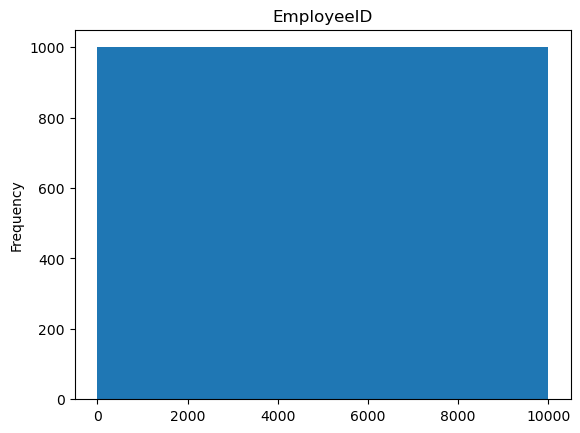

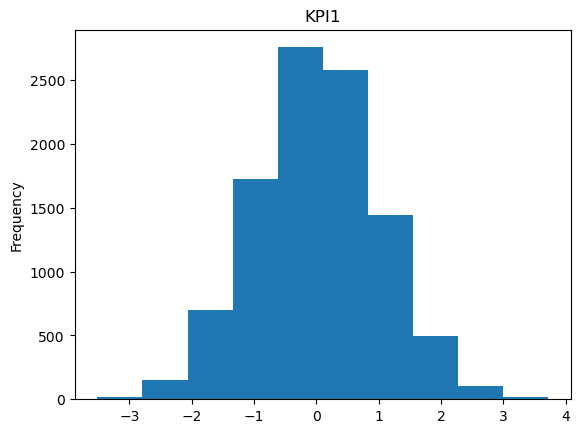

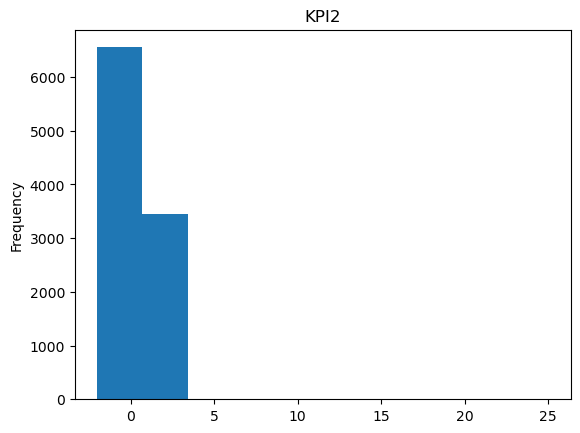

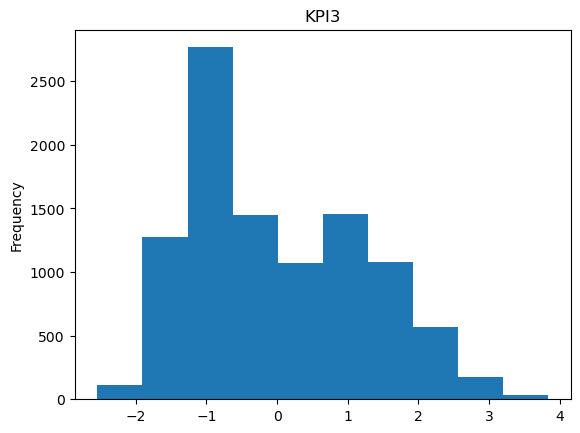

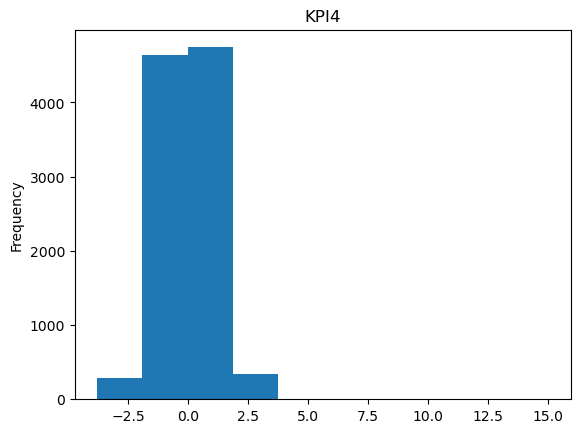

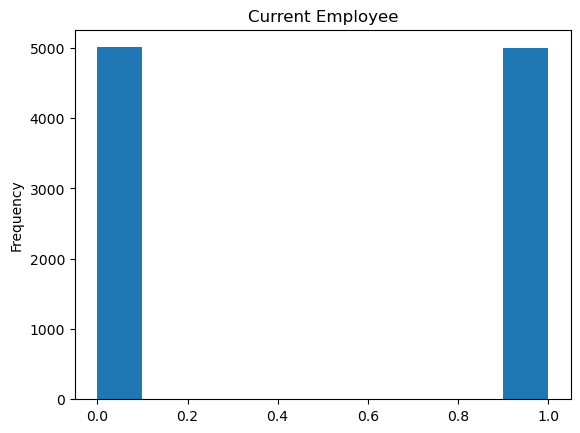

In [17]:
# write your code here 
numerical_cols = [c for c,typ in data.dtypes if typ=="int" or typ =="double"]
pd_df = data.toPandas()
for column in numerical_cols:
    pd_df[column].plot(kind="hist", title=column)
    plt.show()

Observe the distributions of the numerical columns in the histograms generated in the previous part.
- Find the columns with outilers
- Remove the outliers

In [25]:
# write your code here 
print("Before: ", data.count())
data = data.filter(col("KPI2") < 5).filter(col("KPI4") < 5)
print("After: ", data.count())

Before:  10000
After:  9995


Find the missing values in the dataset. 

In [26]:
# write your code here 
data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----------+----+----+----+----+----------------+
|EmployeeID|KPI1|KPI2|KPI3|KPI4|Current Employee|
+----------+----+----+----+----+----------------+
|         0|   4|   0|   2|   0|               0|
+----------+----+----+----+----+----------------+



Use **Mean Imputer** to fill the missing values

In [27]:
from pyspark.ml.feature import Imputer
# write your code here 
columns_with_missing_values = ["KPI1", "KPI3"]
imputer = Imputer(
    inputCols=columns_with_missing_values,
    outputCols=columns_with_missing_values
).setStrategy("mean")
imputer = imputer.fit(data)
data = imputer.transform(data)
data.show()

+----------+------------+------------+------------+------------+----------------+
|EmployeeID|        KPI1|        KPI2|        KPI3|        KPI4|Current Employee|
+----------+------------+------------+------------+------------+----------------+
|         0|-1.039682384|-0.716426478|-0.513467693| 0.414661471|               0|
|         1| 0.237093465|-0.820123996|-0.865801274| 0.438661047|               0|
|         2|-2.077948003| 0.185688029|-0.132418305| 0.711280402|               1|
|         3|-0.684711628| 1.522335039| 1.674082146|-1.234292085|               1|
|         4|-1.137117653|-0.555136531|-0.176780706|-1.776008972|               0|
|         5|-1.052934587| 0.119522573|-0.188215465|-0.867239924|               1|
|         6| 0.953745557| 0.738929252|   0.6416214|-1.069803493|               1|
|         7|-0.623751805| 1.770892731| 2.084658776| 0.436191916|               1|
|         8| 0.998210721| -0.74099461|-0.356348072|-1.950751965|               0|
|         9| 0.7

Again, find the missing values in the dataset to make sure no missing value exists.

In [28]:
# write your code here 
data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----------+----+----+----+----+----------------+
|EmployeeID|KPI1|KPI2|KPI3|KPI4|Current Employee|
+----------+----+----+----+----+----------------+
|         0|   0|   0|   0|   0|               0|
+----------+----+----+----+----+----------------+

